Linear Regression is a statistical method for modeling the relationship between a dependent variable (in this case, price) and an independent variable (the house's area). Our goal is to find the best-fit line that minimizes the difference between the predicted and actual prices.

We'll use the Housing.csv dataset to predict the price of a house based on its area.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df_housing = pd.read_csv('Housing.csv')

# Display the first few rows to understand the data
print("First 5 rows of the dataset:")
print(df_housing[['price', 'area']].head())

First 5 rows of the dataset:
      price  area
0  13300000  7420
1  12250000  8960
2  12250000  9960
3  12215000  7500
4  11410000  7420


### 1. What is Linear Regression?

**Linear Regression** is a fundamental supervised machine learning algorithm used to model the linear relationship between a dependent variable (the target) and one or more independent variables (the features). The goal is to find the "best-fit" straight line that represents the data, allowing us to make predictions.

For a simple linear regression with one feature, the equation is:

$y = mx + c$

-   $y$ is the **predicted value**.
-   $x$ is the **feature** (independent variable).
-   $m$ is the **slope** or **coefficient**, representing how much $y$ changes for every one-unit change in $x$.
-   $c$ is the **y-intercept**, the predicted value of $y$ when $x$ is 0.


### 2. The Cost Function: Measuring the Error

In machine learning, we need a way to quantify how well our model is performing. The **cost function** (also known as the loss function) serves this purpose. It measures the "cost" of our model's errors—the difference between the model's predictions and the actual data points. Our ultimate goal is to minimize this cost.

For linear regression, a popular choice is the **Mean Squared Error (MSE)**. The formula for MSE is:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Here's a breakdown:
-   $(y_i - \hat{y}_i)$ is the **error** for a single data point, the difference between the actual value ($y_i$) and the predicted value ($\hat{y}_i$).
-   We square the error $(...)^2$ to ensure that negative and positive errors don't cancel each other out. This also penalizes larger errors more heavily.
-   We sum these squared errors over all data points (

### 3. Gradient Descent: The Optimization Engine

Now that we can measure the error with our cost function, we need a method to find the parameters ($m$ and $c$) that will minimize this error. This is where **Gradient Descent** comes in. It's an iterative optimization algorithm used to find the minimum of a function.

Think of the cost function as a landscape with hills and valleys. Our goal is to find the lowest point in the valley. Gradient Descent works like this:
1.  We start at a random point on the landscape (an initial guess for $m$ and $c$).
2.  We look around to find the steepest downhill direction. This direction is given by the **gradient** of the cost function.
3.  We take a small step in that direction.
4.  We repeat this process, continuously taking steps in the steepest downhill direction until we reach the bottom of a valley, where the gradient is zero.

The size of each step is controlled by a parameter called the **learning rate**.
-   A **small learning rate** makes the steps tiny, which can be slow but helps ensure we don't miss the minimum.
-   A **large learning rate** makes the steps big, which can be faster but risks overshooting the minimum or even failing to converge.

By repeatedly adjusting the parameters based on the gradient, Gradient Descent systematically finds the optimal $m$ and $c$ values that minimize our cost function.



Step 1: Data Preparation and Visualization
We'll use area as our single feature to predict price. Let's visualize the relationship.

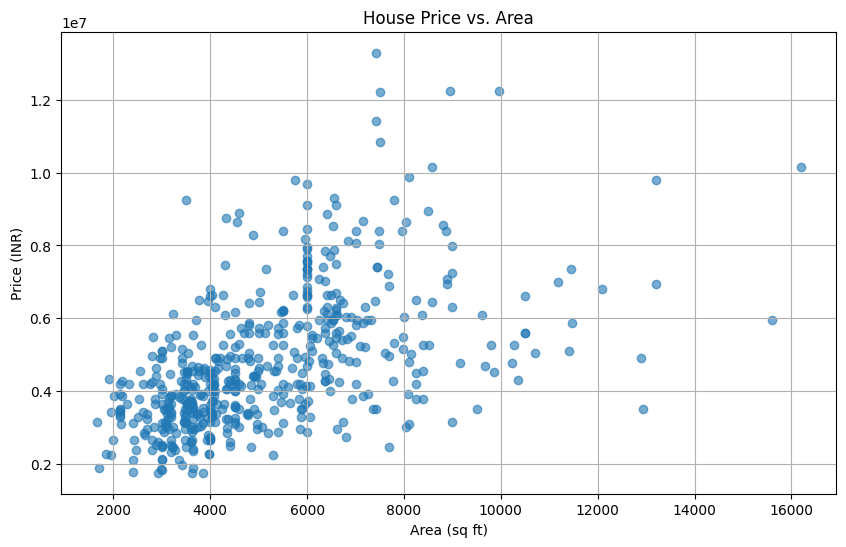

In [2]:
# Plot the relationship between area and price
plt.figure(figsize=(10, 6))
plt.scatter(df_housing['area'], df_housing['price'], alpha=0.6)
plt.title('House Price vs. Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()

The scatter plot shows a clear positive linear relationship, making linear regression a suitable model.

We will split the data into training (80%) and testing (20%) sets to ensure we can evaluate our model's performance on unseen data.

In [3]:
# Select features (X) and target (y)
X = df_housing[['area']].values
y = df_housing[['price']].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")

Training data size: 436 samples
Testing data size: 109 samples


We'll use scikit-learn's LinearRegression model, which uses a form of gradient descent (or a similar optimization method) under the hood to find the best-fit line.

In [4]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the learned parameters (coefficient and intercept)
print(f"Model Coefficient (slope): {model.coef_[0][0]:.2f}")
print(f"Model Intercept: {model.intercept_[0]:.2f}")

Model Coefficient (slope): 425.73
Model Intercept: 2512254.26


Now, we'll use the trained model to predict prices on the test set and evaluate its performance using MSE and R-squared

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 3675286604768.19
R-squared (R²): 0.27


A lower MSE and an R-squared value closer to 1 indicate a better-fitting model.

Finally, let's plot the best-fit line on our test data to visually assess the model's performance.

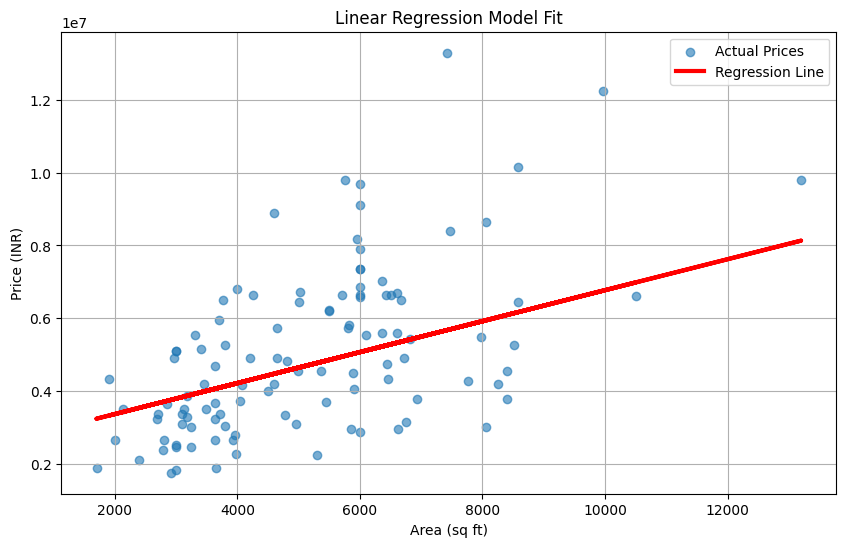

In [7]:
# Plot the regression line on the test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.6, label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regression Line')
plt.title('Linear Regression Model Fit')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()